Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "John Fernow"
COLLABORATORS = ""

---

# Project 3: Kiva Lenders and Loans

> Be sure to include code documentation (docstrings, inline comments) for all Python code you provde.

Access to loans is a huge problem for many people in the world. To combat this problem, Kiva, an international nonprofit, connects people with lenders in an attempt to alleviate poverty. There are over 2.5 million borrowers in 84 countries involved with Kiva. With a 97.1 repayment rate, the 1.6 million lenders have lent over 1 billion dollars. As Kiva is a nonprofit, it has developers worldwide and has shared its data. The Kiva API (application programming interface, a concept we will cover later in this course) has many files and formats containing the information of loans, partners, temas, and more. For the purpose of this project, we will focus on the xml files. The xml files, containing data from June 27, 2017, are included in the `data` directory associated with this project. 

## Project Logistics

This project is targeted at individuals, but I will allow self-selected two person groups.  If using a two person group, I expect both students to be equally able to do (and explain) any of the project parts.  Also, in addition to the two questions and accompanying visualizations specified by your teaching staff, I expect either one additional question/visualization of significant complexity, or two questions/visualizations of moderate complexity.  You may also increase the complexity of a self-defined visualization by using interactive dashboard features of Tableau.

### Grading

There are four aspects of this project:

1. Exploration using Python and XPath
2. Assembling data into `pandas` dataframes
3. Exporting data to SQL tables
4. Questions and Visualization

The first three are demonstrated primarily through Python, will be graded out of 15 points per aspect, and grading will be both for correctness and for good clear functions, docstrings, and inline comments.  You will **not** need a narrative surrounding these first three aspects.

The last aspect will also be graded out of 15 points, and will have greater similarity to the grading of previous projects, with an expectation of a visualization that clearly answers a question and the narrative to put it in context and interpret/explain the results.

## Understand the context

Explore the Kiva site.  In the two cells that follow, write about what you have learned.  These answers will be graded for their clarity, coherence, and quality of writing (paragraph structure/composition, grammar, spelling, etc.). 

For the first one, imagine that you have some money and want to participate as a new lender.  Figure out the process by which you would do this and how you could direct and/or control how your money could be used.

***
Suppose the following situation: I am a U.S. citizen making \$50,000 per year. Currently, I use givewell.org, an indepedent charity evaluator, to systematically decide how to save the most amount of lives from my donations. However, while the charities they list do incredible things, I also want to see if there are methods to bring about long-term change to quality of life to people. As such, I am looking for someone in a developing nation who has an idea that will not only help themselves, but the struggling community around them. Currently, since I have recurring donations to charities like the Against Malaria Foundation, my cap for donating to this business is $2,500, but upon successful results, I will consider donating more.
***

Now imagine that you are a borrower.  In particular, imagine yourself in a disadvantaged locale and/or situation and explore how you would seek funding and specify what you need and what you might do to convince lenders to help crowdsource your funding.

***
Suppose the following situation: I am a local farmer in Ethiopia. Currently, I can produce 2000kg per hectacre with my corn. In the U.S., and in most of the developed world, corn can often produce 6000kg per hectacre. To grow corn more efficiently, I need good seed and good fertilizer, but both of those cost money, money that I do not currently have. If someone lends me the money to purchase that good seed and fertilizer, I can triple my food production and easily pay you back. So why doesn't a bank here lend me money? A large percentage of our people here are farmers, so they can't diversify their loans, and if there's a bug or disease that kills all of our corn, they'll go under. However, while there is a risk, it is essential that I recieve this money, as child mortality is at 8% in this country right now and I fear if I do not gain more money I will not be able to continue to treat my sick child.
***

## Part 1A: Exploring Partners

The file `data/partners.xml` contains information from a pre-assembled snapshot of the field partners (organizations associated with Kiva that group together individual lenders).  Open the file in a text editor and, using the tag names and your intuition, generate a subset list (of size perhaps 6) of the kinds of information maintained about each partner that you find most interesting.

***
NOTE: Clarify that it is the types of information we are making a list of, not lists of organizations with their information.

I find it incredibly helpful that they list the delinquency rate and profitability of different partners. I also find it helpful seeing the "loans at risk rate." I feel seeing all of these factors and having the organization being so transparent dramatically increases people's willingness to donate to them, as they can have an idea of how effective their money really is. I feel the "currency exchange loss rate" is also a helpful metric in calculating where one can do the most good. The default rate is also helpful. And while expected, I feel the descriptions goes a long way of letting potential loaners know whether this is an essential cause or not. 
***

In the following series of cells, we give an English-level information request, and your job is to construct an XML XPath query to provide the answer, demonstrating it on the the xml parner tree/root named `ptree` and `proot`, respectively, and using `print` to output the answer(s) in a clear and readable fashion.  Do as much as you can with the XPath, and rely on subsequent Python programming as little as possible.

In [2]:
# import statements
from lxml import etree
import pandas as pd

# save trees from relevant xml files
stripparser = etree.XMLParser(remove_blank_text=True)

# part 1A
ptree = etree.parse('data/partners.xml', stripparser)
proot = ptree.getroot()

# part 1B
ls1tree = etree.parse('data/loanSearch1.xml', stripparser)
ls1root = ls1tree.getroot()

**Q2a** How many partners are specified in the xml?

In [3]:
partners = proot.xpath("/response/partners/partner/id/text()")
print("There are " + str(len(partners)) + " partners in the xml file.")

There are 79 partners in the xml file.


**Q2b** List the *names* of the partners with a rating greater than 4.

In [4]:
names = proot.xpath("/response/partners/partner/rating[text() > 4.0]/../name/text()")
print("Names of partners with a rating greater than 4.0: ")
[print(name) for name in names]; # semi-colon added to suppress unwanted output

Names of partners with a rating greater than 4.0: 
VisionFund Cambodia
KREDIT Microfinance Institution
Hattha Kaksekar Limited (HKL)
Fundación Paraguaya
BRAC Uganda


**Q2c** Among all partners, what is the maximum *total amount raised*?  What is the minimum *total amount raised*?  Be sure and convert strings to numbers before determining your answer.

In [5]:
maxTotalRaised = max(proot.xpath("//partner/total_amount_raised/text()"))
minTotalRaised = min(proot.xpath("//partner/total_amount_raised/text()"))
print("The maximum total amount raised is: " + str(maxTotalRaised))
print("The minimum total amount raised is: " + str(minTotalRaised))

The maximum total amount raised is: 977800
The minimum total amount raised is: 10021850


**Q2d** In similar fashion, determine the maximum and minimum total amount raised, but amongst the partners with rating >= 4.

In [6]:
maxTotalRaised = max(proot.xpath("//partner/rating[text() > 4.0]/../total_amount_raised/text()"))
minTotalRaised = min(proot.xpath("//partner/rating[text() > 4.0]/../total_amount_raised/text()"))
print("The maximum total amount raised is: " + str(maxTotalRaised))
print("The minimum total amount raised is: " + str(minTotalRaised))

The maximum total amount raised is: 7369875
The minimum total amount raised is: 12088750


**Q2e** Compile a list of tuples containing the `iso_code` and `name` of all the countries represented amongst all the Kiva partners.  Print the number of tuples in the list and the values of the first 10 tuples in the list.

In [7]:
tuples = []
names = proot.xpath("/response/partners/partner/name/text()")
isos = proot.xpath("/response/partners/partner//iso_code/text()")
[tuples.append((names[i],isos[i])) for i in range(len(names))]


print("Number of tuples in list: " + str(len(tuples)))
print("First 10 tuples in list: ")
[print(t) for t in tuples[:10]];

Number of tuples in list: 79
First 10 tuples in list: 
('Réseau de Micro-institutions de Croissance de Revenus (RMCR)', 'ML')
('CrediCampo', 'SV')
('EDAPROSPO', 'PE')
('MicroLoan Foundation (MLF) Malawi', 'MW')
('CIDRE', 'BO')
('MAXIMA Microfinance', 'KH')
('Al Ibdaa Microfinance', 'PS')
('African Clean Energy (ACE)', 'IL')
('VisionFund Cambodia', 'LS')
('South Pacific Business Development (SPBD) - Solomon Islands', 'ZA')


**Q2f** Create lists of delinquincy rates and default rates (as floating point numbers) for all the partners, printing the first five of each.

In [8]:
delinq = proot.xpath("/response/partners/partner/delinquency_rate/text()")
default = proot.xpath("/response/partners/partner/default_rate/text()")

print("First 5 deliquincy rates in list: ")
[print(rate) for rate in delinq[:5]];
print("First 5 default rates in list: ")
[print(rate) for rate in default[:5]];

First 5 deliquincy rates in list: 
1.1125364387655
2.4834444054298
0
0.14391277548997
1.5682302815172
First 5 default rates in list: 
0.54829206321864
1.1828803179341
0
0
1.6012453761993


**Q3a** Build a pandas dataframe with the four columns of partner id, partner name, delinquincy rate, and default rate.  Be sure and set the index to the id and name.  Then use the `.describe()` method on the resultant dataframe to observe a print of the basic statistical information about the two numeric columns.

In [9]:
d = {'delinquency rate': delinq,
     'default rate': default}

# converts types to floats (so a histogram can later be made)
for i in range(len(delinq)):
    delinq[i] = float(delinq[i])
for i in range(len(default)):
    default[i] = float(default[i])

index1 = []
[index1.append(str(partners[i]) + str(names[i])) for i in range(len(names))]

df1 = pd.DataFrame(d, index=[partners,names])
df1.describe()

,default rate,delinquency rate
count,79.000000,79.000000
mean,0.984512,5.494922
std,1.716426,10.164003
min,0.000000,0.000000
25%,0.028471,0.507842
50%,0.242661,1.605414
75%,0.797939,5.200973
max,7.741658,55.716721


**Q3b** The problem with summary statistics is that we sometimes fail to get a sense of the actual distribution of the data.  A visualization of the data through a scatter plot or histogram can often go a long way to conveying whether data follows some kind of normal distribution or has one or a few modes and/or a tail.

While we did not explore the ability of `pandas` to use `matplotlib` earlier in the term, it can be a much quicker way to get a visualization than exporting and then using a tool like `Tableau`.

We still need to use the `matplotlib` paradigm of:

`import matplotlib.pyplot as plt`, then generate some graphics, and then `plt.show()` to get the visualization to appear.  Do this in the cell that follows with the goal of displaying histograms for the two numeric columns of default-rate and delinquincy-rate.  You may have to explore through StackOverflow or the `pandas` documentation how to tell `pandas` to create a historgram.  In the Markdown cell that follows the code cell, interpret your visualization.

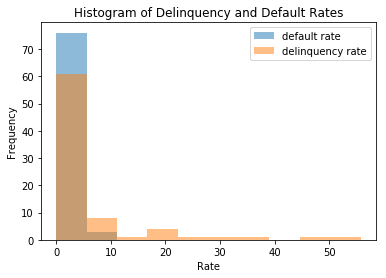

In [10]:
import matplotlib.pyplot as plt

df1.plot.hist(alpha=0.5)
plt.title('Histogram of Delinquency and Default Rates')
plt.xlabel('Rate')
plt.show()

From the above histogram, it is clear that the vast majority of the time, when a partner has a default or delinquency rate above 0, it is a low rate. 

**Q4** Kiva is, in a large part, successful due to their ability to connect regional lenders to borrowers. That means that, given a region (perhaps from whence a borrower has applied), we wish to find the one or more partners from that region.  Start by defining a function that, given a parameter of a `partners.xml` **tree root**, builds and returns a dictionary whose keys are the regions represented and whose values is a list of partner ids for the partners who include that region.
```
findRegions(rootnode)
```
At the end of the solution code cell, call the function and, using the returned dictionary, print the name of the region and the length of the list of partners represented in the region for each region.

In [11]:
def findRegions(rootnode):
    """
    This function finds what partners each country has.
    Input: rootnode - root node of the desired XML file
    Output: regionD - dict with countries as keys, and lists of partners as val
    """
    # creates list of all countries in file
    countries = rootnode.xpath("//country/name/text()")
    
    regionD = {}
    
    # for every country,
    for country in countries:
        # find that country's partners
        partners = rootnode.xpath("//country/name[text()='"+country+"']/../../../name/text()")
        # set country as key, and partners of that country as val
        regionD[country] = partners
    
    return regionD
#=================================================================
regionD = findRegions(proot)
for region, partners in regionD.items():
    print("Region:", region, "Num partners:", len(partners))

Region: Mali Num partners: 1
Region: El Salvador Num partners: 2
Region: Peru Num partners: 4
Region: Malawi Num partners: 1
Region: Bolivia Num partners: 2
Region: Cambodia Num partners: 5
Region: Palestine Num partners: 2
Region: Israel Num partners: 1
Region: Lesotho Num partners: 1
Region: South Africa Num partners: 1
Region: Thailand Num partners: 2
Region: Solomon Islands Num partners: 1
Region: Pakistan Num partners: 2
Region: Haiti Num partners: 2
Region: Kosovo Num partners: 1
Region: Tajikistan Num partners: 2
Region: Ghana Num partners: 2
Region: Mozambique Num partners: 1
Region: The Democratic Republic of the Congo Num partners: 1
Region: Honduras Num partners: 2
Region: Philippines Num partners: 5
Region: Sierra Leone Num partners: 2
Region: Colombia Num partners: 3
Region: Kenya Num partners: 5
Region: Albania Num partners: 1
Region: Jordan Num partners: 2
Region: Nicaragua Num partners: 3
Region: Uganda Num partners: 4
Region: Mexico Num partners: 3
Region: Togo Num par

## Part 1B: Exploring Loans

Kiva has many more loans than partners, and so requests for XML data on loans is split into multiple requests to the server and results in multiple XML files returned.  In the `data` directory, we have stored the result of 10 such requests in the `loanSearch1.xml` through `loanSearch10.xml`.  We will do a few XPath queries to the first of these in order to help understand the structure of the data.  But in **Part 2** our goal is to build `pandas` dataframes for all the data, and your processing will have to iterate over all 10 files to compose the resultant `loan` dataframe.

**Q5** How many individual loans are in `data/loanSearch1.xml`?

In [12]:
loanIDs = ls1root.xpath("//loan/id/text()")
print("There are " + str(len(loanIDs)) + " individual loans here.")

There are 100 individual loans here.


**Q6:** What are the unique values of the `status` element of a `loan`?  Use xpath and build a dictionary to count the frequency of each and print the dictionary at the end.

In [13]:
statuses = ls1root.xpath("//loan/status/text()")
statusCount = {}


for status in statuses:
    # if status already in dict, increase count
    if status in statusCount:
        statusCount[status] += 1
    # else, add the status to the dict
    else:
        statusCount[status] = 1
    
print(statusCount)

{'fundraising': 68, 'funded': 32}


**Q7** How many unique partners (through partner_id) are associated with the set of loans in this first file?

In [14]:
partnerIDs = ls1root.xpath("//loan/partner_id/text()")
uniquePIDs = len(set(partnerIDs))
print("Number of unique partners: " + str(uniquePIDs))

Number of unique partners: 19


**Q8** Similarly, how many unique country_code's are associated with the set of loans in this first file?

In [15]:
countryCodes = ls1root.xpath("//loan/location/country_code/text()")
uniqueCCs = len(set(countryCodes))
print("Number of unique country codes: " + str(uniqueCCs))

Number of unique country codes: 16


## Part 2: Constructing a Sound Set of Tables

Our goal in this section is to create a **sound** set of pandas dataframe tables based on the xml data.  These tables will then be used to create and insert the data into our MySQL database.

Since we have created pandas dataframes both from lists of lists and from a dictionary of columns, I don't want to prescribe which method you use.  But you should define helper functions and use them as you build the tables.  Also remember that you need to repeat the generation of loan data multiple times, once for each of the 10 loan files.

The loans data is already nice, in that it does not require a decomposition into smaller tables.  The partner data, however, has multiple country locations associated with many of the partners.  To make this sound from a relational database standpoint, we need to have tables: `partners`, `locations`, and a linkage table allowing the many-to-many relationship, which we will call `partner_location`.

To help, we specify the four tables to be generated:

```
partners:
  id: int (PK/index)
  name: str
  status: str
  rating: float (Note that some entries have 'Not Rated')
  delinquincy_rate: float
  default_rate: float
  total_amount_raised: int
  loans_posted: int
  
locations:
  iso_code: str (2-char PK/index)
  name: str
  region: str

partner_location:
  partner_id: int (PK/index)
  iso_code: str (PK/index)

loans:
  id: int (PK/index)
  name: str
  status: str
  activity: str
  sector: str
  country_code: str
  partner_id: int
  loan_amount: number

```

Note that you must do conversions between the strings we obtain from XML Xpath queries into fields that are integers or floats.

**Q1** Generate the `pandas` dataframe for the `partners` data, using good documentation and good functional abstraction and decomposition.  Once created, use `head(10)` to display the first 10 rows.

In [16]:
def partnersDF():
    """
    This main function generates a Pandas DataFrame for the essential
    information about the partners in the partners.xml file.
    It then displays the first 10 rows of the generated DataFrame.
    
    Output: df - Pandas DataFrame of the essential info of XML file.
    """
    
    # run XPath statements to find necessary data
    ids, names, statuses, ratings, delinqs, defaults, totalRaised, loans = partnersLists()
    
    # convert to necessary formats
    ids, names, statuses, ratings, delinqs, defaults, totalRaised, loans \
    = partnersConvert(ids, names, statuses, ratings, delinqs, defaults, totalRaised, loans)
    
    # create DataFrame
    df = generatePartnersDF(ids, names, statuses, ratings, delinqs, 
                            defaults, totalRaised, loans)
    
    return df
#====================================================================
def partnersLists():
    """
    This function uses XPath statements to generate lists of the
    essential information from the XML file.
    
    Output: desired lists (ids, names, etc.)
    """
    ids = proot.xpath("/response/partners/partner/id/text()")
    names = proot.xpath("/response/partners/partner/name/text()")
    statuses = proot.xpath("//partners/partner/status/text()")
    ratings = proot.xpath("//partner/rating/text()")
    delinqs = proot.xpath("//partner/delinquency_rate/text()")
    defaults = proot.xpath("//partner/default_rate/text()")
    totalRaised = proot.xpath("//partner/total_amount_raised/text()")
    loans = proot.xpath("//partner/loans_posted/text()")
    
    return ids, names, statuses, ratings, delinqs, defaults, totalRaised, loans
#====================================================================
def partnersConvert(ids, names, statuses, ratings, delinqs, defaults, totalRaised, loans):
    """
    This function converts the items of each list into the necessary format,
    as when the lists are generated from XPath, they are all lxml objects. However,
    because one may want to sort the generated DataFrame, it is necessary to
    convert the types of some of those lists into numeric types.
    
    Input: several lists (ids, names, etc.)
    Output: several lists (ids, names, etc.) (now converted)
    """
    ids = [int(idn) for idn in ids]
    names = [str(name) for name in names]
    statuses = [str(status) for status in statuses]
    delinqs = [float(rate) for rate in delinqs]
    defaults = [float(rate) for rate in defaults]
    totalRaised = [int(total) for total in totalRaised]
    loans = [int(loan) for loan in loans]
    
    # ratings' text not all same type; must have special conversion
    for i in range(len(ratings)):
        try:
            ratings[i] = float(ratings[i])
        except:
            ratings[i] = -1 # -1 is representing no rating
    
    return ids, names, statuses, ratings, delinqs, defaults, totalRaised, loans
#====================================================================
def generatePartnersDF(ids, names, statuses, ratings, delinqs, defaults, totalRaised, loans):
    """
    This function creates a Pandas DataFrame from the lists it is given.
    
    Input: several lists (ids, names, etc.)
    Output: df - Pandas DataFrame
    """
    d = {'id':ids,
        'name':names,
        'status':statuses,
        'rating':ratings,
        'delinquincy_rate':delinqs,
        'default_rate':defaults,
        'total_amount_raised':totalRaised,
        'loans_posted':loans}
    
    df = pd.DataFrame(d)
    
    return df
#====================================================================
partnerDF = partnersDF()
partnerDF.head(10)

,default_rate,delinquincy_rate,id,loans_posted,name,rating,status,total_amount_raised
0,0.548292,1.112536,438,1489,Réseau de Micro-institutions de Croissance de ...,3.0,active,3510425
1,1.182880,2.483444,199,18323,CrediCampo,4.0,active,11913025
2,0.000000,0.000000,93,6262,EDAPROSPO,3.5,active,12830625
3,0.000000,0.143913,381,880,MicroLoan Foundation (MLF) Malawi,1.0,active,1082525
4,1.601245,1.568230,140,2667,CIDRE,3.5,active,4133950
5,0.015814,0.000000,61,5671,MAXIMA Microfinance,3.5,active,4118325
6,0.000000,0.961473,462,559,Al Ibdaa Microfinance,2.5,active,793150
7,0.000000,30.098506,452,420,African Clean Energy (ACE),1.5,active,357750
8,0.242661,3.048890,204,16238,VisionFund Cambodia,4.5,active,12088750
9,0.000000,0.414065,411,486,South Pacific Business Development (SPBD) - So...,1.0,active,452900


**Q2** Generate the `pandas` dataframe for the `locations` data, using good documentation and good functional abstraction and decomposition.  Once created, use `head(10)` to display the first 10 rows.

In [17]:
def locationsDF():
    """
    This main function generates a Pandas DataFrame for the 
    essential information on location data in the partners.xml file.
    It then displays the first 10 rows of the generated DataFrame.
    
    Output: df - Pandas DataFrame of the essential info of XML file.
    """
    
    # run XPath statements to find necessary data
    ISOs, lnames, regions = locationLists()
    
    # convert to necessary formats
    ISOs, lnames, regions = locationConvert(ISOs, lnames, regions)
    
    # create DataFrame
    df = generateLocationDF(ISOs, lnames, regions)
    
    return df
#====================================================================
def locationLists():
    """
    This function uses XPath statements to generate lists of the
    essential information from the XML file.
    
    Output: desired lists (ISOs, lnames, regions)
    """
    ISOs = proot.xpath("//countries/country/iso_code/text()")
    lnames = proot.xpath("//countries/country/name/text()")
    regions = proot.xpath("//countries/country/region/text()")
    
    return ISOs, lnames, regions
#====================================================================
def locationConvert(ISOs, lnames, regions):
    """
    This function converts the items of each list into the necessary
    format, as when the lists are generated from XPath, they are all
    lxml objects. However, because one may want to sort the generated
    DataFrame, it is necessary to convert the types of some of those
    lists into numeric types.
    
    Input: several lists (ids, names, etc.)
    Output: several lists (ids, names, etc.) (now converted)
    """
    ISOs = [str(iso) for iso in ISOs]
    lnames = [str(name) for name in lnames]
    regions = [str(region) for region in regions]

    return ISOs, lnames, regions
#====================================================================
def generateLocationDF(ISOs, lnames, regions):
    """
    This function creates a Pandas DataFrame
    from the lists it is given.
    
    Input: several lists (ISOs, lnames, regions)
    Output: df - Pandas DataFrame
    """
    d = {'iso_code':ISOs,
        'name':lnames,
        'region':regions}

    df = pd.DataFrame(d)
    
    return df
#====================================================================
locationDF = locationsDF()
locationDF.head(10)

,iso_code,name,region
0,ML,Mali,Africa
1,SV,El Salvador,Central America
2,PE,Peru,South America
3,MW,Malawi,Africa
4,BO,Bolivia,South America
5,KH,Cambodia,Asia
6,PS,Palestine,Middle East
7,IL,Israel,Middle East
8,LS,Lesotho,Africa
9,ZA,South Africa,Africa


**Q3** Generate the `pandas` dataframe for the `partner_location` data, using good documentation and good functional abstraction and decomposition.  Once created, use `head(10)` to display the first 10 rows.

In [18]:
def p_lDF():
    """
    This main function generates a Pandas DataFrame for the essential
    information about the partners in the partners.xml file.
    It then displays the first 10 rows of the generated DataFrame.
    
    Output: df - Pandas DataFrame of the essential info of XML file.
    """
    
    # run XPath statements to find necessary data
    ids, names, statuses, ratings, delinqs, defaults, totalRaised, \
    loans, ISOs, lnames, regions = p_lLists()
    
    # convert to necessary formats
    ids, names, statuses, ratings, delinqs, defaults, totalRaised, \
    loans, ISOs, lnames, regions \
    = p_lConvert(ids, names, statuses, ratings, delinqs, defaults, 
                 totalRaised, loans, ISOs, lnames, regions)
    
    # create DataFrame
    df = generate_p_l_DF(ids, names, statuses, ratings, delinqs,
                         defaults, totalRaised, loans, ISOs, 
                         lnames, regions)
    
    return df
#====================================================================
def p_lLists():
    """
    This function uses XPath statements to generate lists of the
    essential information from the XML file.
    
    Output: desired lists (ids, names, etc.)
    """
    ids = proot.xpath("/response/partners/partner/id/text()")
    names = proot.xpath("/response/partners/partner/name/text()")
    statuses = proot.xpath("//partners/partner/status/text()")
    ratings = proot.xpath("//partner/rating/text()")
    delinqs = proot.xpath("//partner/delinquency_rate/text()")
    defaults = proot.xpath("//partner/default_rate/text()")
    totalRaised = proot.xpath("//partner/total_amount_raised/text()")
    loans = proot.xpath("//partner/loans_posted/text()")
    
    ISOs = proot.xpath("//countries/country/iso_code/text()")
    lnames = proot.xpath("//countries/country/name/text()")
    regions = proot.xpath("//countries/country/region/text()")
    
    
    return ids, names, statuses, ratings, delinqs, defaults, totalRaised, loans, ISOs, lnames, regions
#====================================================================
def p_lConvert(ids, names, statuses, ratings, delinqs, defaults, totalRaised, loans, ISOs, lnames, regions):
    """
    This function converts the items of each list into the necessary format,
    as when the lists are generated from XPath, they are all lxml objects. However,
    because one may want to sort the generated DataFrame, it is necessary to
    convert the types of some of those lists into numeric types.
    
    Input: several lists (ids, names, etc.)
    Output: several lists (ids, names, etc.) (now converted)
    """
    ids = [int(idn) for idn in ids]
    names = [str(name) for name in names]
    statuses = [str(status) for status in statuses]
    delinqs = [float(rate) for rate in delinqs]
    defaults = [float(rate) for rate in defaults]
    totalRaised = [int(total) for total in totalRaised]
    loans = [int(loan) for loan in loans]
    
    # ratings' text not all same type; must have special conversion
    for i in range(len(ratings)):
        try:
            ratings[i] = float(ratings[i])
        except:
            ratings[i] = -1 # -1 is representing no rating
    
    return ids, names, statuses, ratings, delinqs, defaults, totalRaised, loans, ISOs, lnames, regions
#====================================================================
def generate_p_l_DF(ids, names, statuses, ratings, delinqs, defaults, totalRaised, loans, ISOs, lnames, regions):
    """
    This function creates a Pandas DataFrame from the lists it is given.
    
    Input: several lists (ids, names, etc.)
    Output: df - Pandas DataFrame
    """
    d = {'id':ids,
        'name':names,
        'status':statuses,
        'rating':ratings,
        'delinquincy_rate':delinqs,
        'default_rate':defaults,
        'total_amount_raised':totalRaised,
        'loans_posted':loans}
    
    df = pd.DataFrame(d)
    
    return df
#====================================================================
partner_l_DF = p_lDF()
partner_l_DF.head(10)

,default_rate,delinquincy_rate,id,loans_posted,name,rating,status,total_amount_raised
0,0.548292,1.112536,438,1489,Réseau de Micro-institutions de Croissance de ...,3.0,active,3510425
1,1.182880,2.483444,199,18323,CrediCampo,4.0,active,11913025
2,0.000000,0.000000,93,6262,EDAPROSPO,3.5,active,12830625
3,0.000000,0.143913,381,880,MicroLoan Foundation (MLF) Malawi,1.0,active,1082525
4,1.601245,1.568230,140,2667,CIDRE,3.5,active,4133950
5,0.015814,0.000000,61,5671,MAXIMA Microfinance,3.5,active,4118325
6,0.000000,0.961473,462,559,Al Ibdaa Microfinance,2.5,active,793150
7,0.000000,30.098506,452,420,African Clean Energy (ACE),1.5,active,357750
8,0.242661,3.048890,204,16238,VisionFund Cambodia,4.5,active,12088750
9,0.000000,0.414065,411,486,South Pacific Business Development (SPBD) - So...,1.0,active,452900


**Q4** Generate the `pandas` dataframe for the `loans` data, using good functional abstraction and documentation.

In [19]:
def loansDF():
    """
    This main function generates a Pandas DataFrame for the 
    essential information on partner location data in the 
    partners.xml file. It then displays the first 10 rows of 
    the generated DataFrame.
    
    Output: df - Pandas DataFrame of the essential info of XML file.
    """
    
    # run XPath statements to find necessary data
    idL,nameL,statusL,activityL,sectorL,ccL,pidL,loanL = loansLists()
    
    # convert to necessary formats
    idL,nameL,statusL,activityL,sectorL,ccL,pidL,loanL = \
    loansConvert(idL,nameL,statusL,activityL,sectorL,ccL,pidL,loanL)
    
    # create DataFrame
    df = generateLoansDF(idL,nameL,statusL,activityL,sectorL,ccL,pidL,loanL)
    
    return df
#====================================================================
def loansLists():
    """
    This function uses XPath statements to generate lists of the
    essential information from the XML files.
    
    Output: desired lists (idL, nameL, etc.)
    """
    
    # change below if using different files
    files = ['loanSearch1.xml','loanSearch2.xml','loanSearch3.xml',
            'loanSearch4.xml','loanSearch5.xml','loanSearch6.xml',
            'loanSearch7.xml','loanSearch8.xml','loanSearch9.xml',
            'loanSearch10.xml']

    idL,nameL,statusL,activityL,sectorL,ccL,pidL,loanL = \
    [],[],[],[],[],[],[],[]
    
    for file in files:
        tree = etree.parse('data/'+file, stripparser)
        root = tree.getroot()

        t_idL = root.xpath("//loan/id/text()")
        t_nameL = root.xpath("//loan/name/text()")
        t_statusL = root.xpath("//loan/status/text()")
        t_activityL = root.xpath("//loan/activity/text()")
        t_sectorL = root.xpath("//loan/sector/text()")
        t_ccL = root.xpath("//location/country_code/text()")
        t_pidL = root.xpath("//loan/partner_id/text()")
        t_loanL = root.xpath("//loan/loan_amount/text()")
        
        # append contents found from this file to master list
        idL += t_idL
        nameL += t_nameL
        statusL += t_statusL
        activityL += t_activityL
        sectorL += t_sectorL
        ccL += t_ccL
        pidL += t_pidL
        loanL += t_loanL
        
    return idL,nameL,statusL,activityL,sectorL,ccL,pidL,loanL
#====================================================================
def loansConvert(idL,nameL,statusL,activityL,sectorL,ccL,pidL,loanL):
    """
    This function converts the items of each list into the necessary
    format, as when the lists are generated from XPath, they are all
    lxml objects. However, because one may want to sort the generated
    DataFrame, it is necessary to convert the types of some of those
    lists into numeric types.
    
    Input: several lists (partnerIDs, ISOcodes)
    Output: several lists (partnerIDs, ISOcodes) (now converted)
    """
    idL = [int(n) for n in idL]
    nameL = [str(n) for n in nameL]
    statusL = [str(n) for n in statusL]
    activityL = [str(n) for n in activityL]
    sectorL = [str(n) for n in sectorL]
    ccL = [str(n) for n in ccL]
    pidL = [int(n) for n in pidL]
    loanL = [int(n) for n in loanL]

    return idL,nameL,statusL,activityL,sectorL,ccL,pidL,loanL
#====================================================================
def generateLoansDF(idL,nameL,statusL,activityL,sectorL,ccL,pidL,loanL):
    """
    This function creates a Pandas DataFrame
    from the lists it is given.
    
    Input: several lists (partnerIDs, ISOcodes)
    Output: df - Pandas DataFrame
    """
    d = {'id':idL,
         'name':nameL,
         'status': statusL,
         'activity': activityL,
         'sector': sectorL,
         'country_code': ccL,
         'partner_id':pidL,
         'loan_amount': loanL}

    df = pd.DataFrame(d)
    
    return df
#====================================================================
loansDF = loansDF()
loansDF.head(10)

,activity,country_code,id,loan_amount,name,partner_id,sector,status
0,Fuel/Firewood,PK,1322317,500,Maqsoodan,247,Retail,fundraising
1,Retail,ML,1317131,5900,Djigui-Tougou Group,438,Retail,fundraising
2,Farming,KH,1315977,500,Nay,204,Agriculture,fundraising
3,Retail,SL,1321513,550,Park Light Group,148,Retail,fundraising
4,General Store,PH,1322318,625,Susan,145,Retail,funded
5,Pigs,MG,1317130,125,Marie Aurélie,359,Agriculture,fundraising
6,Personal Products Sales,CO,1321794,175,Elmer De Jesus,177,Retail,fundraising
7,Pigs,PH,1322316,150,Teodora,145,Agriculture,funded
8,Perfumes,PY,1327214,3050,Triunfadoras Group,58,Retail,fundraising
9,Florist,MM,1321412,925,Pauk Pin – 5 Group,416,Retail,fundraising


### Analysis in Pandas

Using your created pandas dataframes, answer the following questions, giving code in the following code cell, and textual answers in the markdown cell that follows that.

**Question 1:** What are the 5 countries that get the largest mean loan amount? Does your answer make sense?

In [20]:
def q1():
    """
    This function finds the 5 countries that get the largest mean
    loan amount.
    
    Output: DF of top 5 countries by mean loan amount
    """
        
    files = ['loanSearch1.xml','loanSearch2.xml','loanSearch3.xml',
            'loanSearch4.xml','loanSearch5.xml','loanSearch6.xml',
            'loanSearch7.xml','loanSearch8.xml','loanSearch9.xml',
            'loanSearch10.xml']
    
    cL, laL = [],[]
    
    countries = proot.xpath("//countries/country/name/text()")
    ids = proot.xpath("/response/partners/partner/id/text()")
    
    for file in files:
        tree = etree.parse('data/'+file, stripparser)
        root = tree.getroot()

        t_cL = root.xpath("//loan/location/country/text()")
        t_laL = root.xpath("//loan/loan_amount/text()")
        
        cL += t_cL
        laL += t_laL
    
    avgLoan = []
    for i in range(len(countries)):
        temp = []
        for j in range(len(cL)):
            if countries[i] == cL[j]:
                temp.append(int(laL[j]))
        try:
            avgLoan.append(sum(temp)/len(temp))
        except:
            avgLoan.append(0)
        
    d = {'Country':countries,
          'Average Loan Amount':avgLoan}
    
    df = pd.DataFrame(d)
    
    return df 
#====================================================================
q1DF = q1()
q1DF.sort_values(by='Average Loan Amount', ascending=False).head(6).drop_duplicates()

,Average Loan Amount,Country
70,9950.000000,United States
60,4261.029412,Rwanda
58,3366.666667,Paraguay
0,3021.428571,Mali
4,2645.000000,Bolivia


***
The top 5 countries by average loan amount are the United States, Rwanda, Paraguay, Mali, and Bolivia. My answer does not make much sense since the United States has the highest nominal GDP in the world, it is odd that it receives the highest average loan amount.
***

**Question 2: **What are the top 5 average loan amounts in countries that get more than 50 loans? Does this make more sense than what you saw initially? **Hint:** It may be helpful to use the .agg() method here. For help on the syntax for this method, use the help function.

In [21]:
def q2():
    """
    This function finds the 5 countries that get the largest mean
    loan amount if they have more than 50 loans
    
    Output: DF of top 5 countries by mean loan amount 
            (if they have more than 50 loans)
    """
        
    files = ['loanSearch1.xml','loanSearch2.xml','loanSearch3.xml',
            'loanSearch4.xml','loanSearch5.xml','loanSearch6.xml',
            'loanSearch7.xml','loanSearch8.xml','loanSearch9.xml',
            'loanSearch10.xml']
    
    cL, laL = [],[] #country list, loan average list
    
    countries = proot.xpath("//countries/country/name/text()")
    ids = proot.xpath("/response/partners/partner/id/text()")
    
    # run statements for each loanSearchXX.xml file
    for file in files:
        tree = etree.parse('data/'+file, stripparser)
        root = tree.getroot()

        t_cL = root.xpath("//loan/location/country/text()")
        t_laL = root.xpath("//loan/loan_amount/text()")
        
        cL += t_cL
        laL += t_laL
    
    # find number of loans for each country
    d1 = {}
    for country in cL:
        if country in d1:
            d1[country] += 1
        else:
            d1[country] = 1
    count = []
    for country in countries:
        try:
            count.append(d1[country])
        except:
            count.append(0)
    
    
    # find average loans
    avgLoan = []
    for i in range(len(countries)):
        temp = []
        for j in range(len(cL)):
            if countries[i] == cL[j]:
                temp.append(int(laL[j]))
        try:
            avgLoan.append(sum(temp)/len(temp))
        except:
            avgLoan.append(0)
    
    # only include countries with greater than 50 loans
    goodIndexes = []
    for i in range(len(count)):
        if count[i] > 50:
            goodIndexes.append(i)
    l1,l2,l3 = [],[],[]
    for i in range(len(count)):
        if i in goodIndexes:
            l1.append(countries[i])
            l2.append(count[i])
            l3.append(avgLoan[i])

    # create DataFrame
    d = {'Country':l1,
         'Number of loans':l2,
         'Average Loan Amount':l3} 
    df = pd.DataFrame(d)
    
    return df 
#====================================================================
q2DF = q2()
q2DF.sort_values(by='Average Loan Amount', ascending=False).drop_duplicates()

,Average Loan Amount,Country,Number of loans
6,842.727273,Samoa,55
14,736.065574,Uganda,61
0,622.983871,El Salvador,62
10,398.643411,Kenya,129
7,323.736462,Philippines,277


***
The 5 countries with the highest average loans are Samoa, Uganda, El Salvador, Kenya, Philippines. This makes more sense now that the United States is not listed. Since all of these countries have relatively low nominal and per capita GDP, it makes sense why they are the largest loan receivers (on average).
***

**Question 3:** Create a pandas dataframe that contains the following columns: Name of partner, number of loans posted in our sample (so you need to combine loans and partners in an appropriate way), sum of these loans, and average loan amount. What are the names of the top 3 partners that gives the biggest average loan and have posted more than 20 loans in our sample.

In [22]:
def q3():
    """
    This function is used to find the 5 countries that give the 
    largest mean loan amount if they have more than 20 loans.
    It does so by displaying the Average Loan Amount, the
    Name of partner, the Number of loans, and the Sum of these loans.
    
    Output: Pandas DataFrame
    """
        
    files = ['loanSearch1.xml','loanSearch2.xml','loanSearch3.xml',
            'loanSearch4.xml','loanSearch5.xml','loanSearch6.xml',
            'loanSearch7.xml','loanSearch8.xml','loanSearch9.xml',
            'loanSearch10.xml']
    
    p_idL, laL = [],[]
    
    names = proot.xpath("/response/partners/partner/name/text()")
    ids = proot.xpath("/response/partners/partner/id/text()")
    
    for file in files:
        tree = etree.parse('data/'+file, stripparser)
        root = tree.getroot()

        t_idL = root.xpath("//loan/partner_id/text()")
        t_laL = root.xpath("//loan/loan_amount/text()")
        
        p_idL += t_idL
        laL += t_laL

    
    d1 = {}
    
    for idn in p_idL:
        if idn in d1:
            d1[idn] += 1
        else:
            d1[idn] = 1

    count = []
    for idn in ids:
        count.append(d1[idn])
        
    loanSum, avgLoan = [],[]
    for i in range(len(ids)):
        temp = []
        for j in range(len(p_idL)):
            if ids[i] == p_idL[j]:
                temp.append(int(laL[j]))
        loanSum.append(sum(temp))
        avgLoan.append(sum(temp)/len(temp))
        
    d2 = {'Name of partner':names,
          'Number of loans':count,
          'Sum of these loans':loanSum,
          'Average Loan Amount':avgLoan}
    
    df = pd.DataFrame(d2)
    
    return df 
#====================================================================
q3DF = q3()
q3DF.sort_values(by='Average Loan Amount', ascending=False).head(3)

,Average Loan Amount,Name of partner,Number of loans,Sum of these loans
65,9950.000000,Solar and Energy Loan Fund (SELF),1,9950
55,5100.000000,Urwego Opportunity Bank,26,132600
53,3366.666667,Fundación Paraguaya,6,20200


The names of the 3 partners with the highest average loan amount (with a number of loans greater than 20) Solar and Energy Loan Fund (SELF), Urwego Opportunity Bank, and Fundación Paraguaya. 

## Part 3: Export to SQL

To create a nice visualization, and to see the easy way we can use a MySQL to Tableau connection, put your four tables into our MySQL server.

In [23]:
# Convert types

# to check, make sure I have 1000 loans

#q1DF
q1DF = q1DF.astype({'Country':str})

#q2DF
q2DF = q2DF.astype({'Country':str})

#q3DF
q3DF = q3DF.astype({'Name of partner':str})

In [24]:
from keys import keychain
from sqlalchemy import create_engine, Table, MetaData, select, or_, func

def setup():
    
    userid = keychain['MySQL']['userid']
    userpass = keychain['MySQL']['userpass']
    protocol = "mysql+mysqlconnector"
    mysqlhost = "hadoop2.mathsci.denison.edu"
    database = "fernow_j1"
    connectionstring = "{}://{}:{}@{}/{}".format(protocol, userid, userpass, mysqlhost, database)
    engine = create_engine(connectionstring)
    metadata = MetaData()
    
    #==============================================
    with engine.connect() as c:
        q1DF.to_sql('q1DF', c, if_exists='replace', index=False)
        q2DF.to_sql('q2DF', c, if_exists='replace', index=False)
        q3DF.to_sql('q3DF', c, if_exists='replace', index=False)
    
setup()


## Part 4: Questions and Visualizations

### Question/Visualization 1

We are interested in the geographic impact of the Kiva Partners and Loans, and want to "see" what countries and regions are most heavily represented as partner lenders and as borrowers.  Using map visualization(s), and augmenting with some descriptive measures (counts of partners or borrowers), answer this question.

### Question/Visualization 2

In a more quantitative way, we want to know the sum of actual loan amounts by region and by country.  With a well constructed/annotated stacked bar graph, answer this question.

***
Question/Visualization 1  

This visualization below shows us that almost nowhere in Europe, and absolutely nowhere in Australia, received any loans at all. It also shows that the vast majority of loans took place in Africa and Asia.
![v1](v1.png "v1") 

***
Question/Visualization 2
To look at it more systematically, we can see the following graph.
![Recipients](received_country.png "recipients") 
As it displays, Rwanda received the most amount of money in loans, with the Philipines the next closest.

We can also take a look by region, and see that Africa and Asia receive the greatest.
![region](region.png "region") 

Finally, we can view the two together as a stacked bar graph.
![v2](v2.png "stacked") 
***